<img src="img/python-logo-notext.svg"
     style="display:block;margin:auto;width:10%"/>
<h1 style="text-align:center;">Python: NumPy</h1>
<h2 style="text-align:center;">Coding Akademie München GmbH</h2>
<br/>
<div style="text-align:center;">Dr. Matthias Hölzl</div>

# Listen als Vektoren und Matrizen

Wir können Python Listen verwenden um Vektoren darzustellen:

In [ ]:
vector1 = [3, 2, 4]
vector2 = [8, 9, 7]

Es wäre dann möglich, Vektoroperationen auf derartigen Listen zu implementieren:

In [ ]:
def vector_sum(v1, v2):
    assert len(v1) == len(v2)
    result = [0] * len(v1)
    for i in range(len(v1)):
        result[i] = v1[i] + v2[i]
    return result

In [ ]:
vector_sum(vector1, vector2)

Matrizen könnten dann als "Listen von Listen" dargestellt werden:

In [ ]:
matrix = [[1, 2, 3],
          [2, 3, 4],
          [3, 4, 5]]

Diese Implementierungsvariante hat jedoch einige Nachteile:
- Performanz
    - Speicher
    - Geschwindigkeit
    - Parallelisierbarkeit
- Interface
    - Zu allgemein
    - `*`, `+` auf Listen entspricht nicht den Erwartungen
    - ...
- ...

# NumPy

NumPy ist eine Bibliothek, die einen Datentyp für $n$-dimensionale Tensoren (`ndarray`) sowie effiziente Operationen darauf bereitstellt.
- Vektoren
- Matrizen
- Grundoperationen für Lineare Algebra
- Tensoren für Deep Learning

Fast alle anderen mathematischen und Data-Science-orientierten Bibliotheken für Python bauen auf NumPy auf (Pandas, SciPy, Statsmodels, TensorFlow, ...).

## Überblick

In [ ]:
import numpy as np

In [ ]:
v1 = np.array([3, 2, 4])
v2 = np.array([8, 9, 7])

In [ ]:
type(v1)

In [ ]:
v1.dtype

In [ ]:
v1 + v2

In [ ]:
v1 * v2 # Elementweises (Hadamard) Produkt

In [ ]:
v1.dot(v2)

In [ ]:
v1.sum()

In [ ]:
v1.mean()

In [ ]:
v1.max()

In [ ]:
v1.argmax(), v1[v1.argmax()]

In [ ]:
m1 = np.array([[1, 2, 3],
               [4, 5, 6]])
m2 = np.array([[1, 0],
               [0, 1],
               [2, 3]])

In [ ]:
 # m1 + m2

In [ ]:
m1.T

In [ ]:
m1.T + m2

In [ ]:
m1.dot(m2)

## Erzeugen von NumPy Arrays

### Aus Python Listen

Durch geschachtelte Listen lassen sich Vektoren, Matrizen und Tensoren erzeugen:

In [ ]:
vector = np.array([1, 2, 3, 4])
vector

In [ ]:
vector.shape

In [ ]:
matrix = np.array([[1, 2, 3], [4, 5, 6]])
matrix

In [ ]:
matrix.shape

In [ ]:
tensor = np.array([[[1, 2], [3, 4]],
                   [[5, 6], [7, 8]]])
tensor

In [ ]:
tensor.shape

### Als Intervall bzw. Folge

In [ ]:
np.arange(10)

In [ ]:
np.arange(10.0)

In [ ]:
np.arange(2, 10)

In [ ]:
np.arange(3., 23., 5.)

In [ ]:
np.linspace(0, 10, 5)

In [ ]:
np.linspace(0.1, 1, 10)

In [ ]:
np.arange(0.1, 1.1, 0.1)

### Konstant 0 oder 1

In [ ]:
np.zeros(3)

In [ ]:
np.zeros((3,))

In [ ]:
np.zeros((3, 3))

In [ ]:
np.ones(2)

In [ ]:
np.ones((4, 5))

### Als Identitätsmatrix

In [ ]:
np.eye(4)

### Aus Zufallsverteilung

Numpy bietet eine große Anzahl von möglichen [Generatoren und Verteilungen](https://docs.scipy.org/doc/numpy/reference/random/index.html) zum Erzeugen von Vektoren und Arrays mit zufälligen Elementen.

#### Setzen des Seed-Wertes

In [ ]:
np.random.seed(101)

#### Gleichverteilt in [0, 1)

In [ ]:
# Kompatibilität mit Matlab
np.random.seed(101)
np.random.rand(10)

In [ ]:
np.random.rand(4, 5)

In [ ]:
# Fehler
# np.random.rand((4, 5))

In [ ]:
np.random.seed(101)
np.random.random(10)

In [ ]:
np.random.random((4, 5))

#### Normalverteilte Zufallszahlen

In [ ]:
# Kompatibilität mit Matlab
np.random.seed(101)
np.random.randn(10)

In [ ]:
np.random.randn(4, 5)

In [ ]:
# Fehler
# np.random.randn((4, 5))

In [ ]:
np.random.seed(101)
np.random.standard_normal(10)

In [ ]:
np.random.standard_normal((4, 5))

In [ ]:
np.random.seed(101)
np.random.normal(10.0, 1.0, 10)

In [ ]:
np.random.normal(0.0, 1.0, (4, 5))

In [ ]:
np.random.normal(10.0, 0.2, (2, 5))

#### Multivariate Normalverteilung


In [ ]:
means = np.array([0.0, 2.0, 1.0])
cov = np.array([[2.0, -1.0, 0.0],
                [-1.0, 2.0, -1.0],
                [0.0, -1.0, 2.0]])
np.random.multivariate_normal(means, cov, (3,))

#### Andere Verteilungen

In [ ]:
np.random.binomial(10, 0.2, 88)

In [ ]:
np.random.multinomial(20, [1/6.0] * 6, 10)

Die [Dokumentation](https://docs.scipy.org/doc/numpy/reference/random/generator.html) enthält eine Liste aller Verteilungen und ihrer Parameter.

## Mini-Workshop

- Notebook `050x-Workshop NumPy`
- Abschnitt "Erzeugen von NumPy Arrays"


## Exkurs: Lösen von Gleichungssystemen

Wie können wir das folgende Gleichungssystem mit NumPy darstellen und lösen:

$$
2x_0 + x_1 + x_2 = 4\\
x_0 + 3x_1 + 2x_2 = 5\\
x_0 = 6
$$

In [ ]:
a = np.array([[2., 1., 1.],
              [1., 3., 2.],
              [1., 0., 0.]])
b = np.array([4., 5., 6.])

In [ ]:
x = np.linalg.solve(a, b)
x

In [ ]:
# Test:
a.dot(x), b

SciPy bietet spezielle Lösungsverfahren wie LU-Faktorisierung, Cholesky-Faktorisierung, etc. an.

In [ ]:
import scipy.linalg as linalg
lu = linalg.lu_factor(a)

In [ ]:
lu

In [ ]:
x = linalg.lu_solve(lu, b)

In [ ]:
x

In [ ]:
a.dot(x)

In [ ]:
# Hermite'sche Matrix, positiv definit
a = np.array([[10., -1., 2., 0.],
             [-1., 11., -1., 3.],
             [2., -1., 10., -1.],
             [0., 3., -1., 8.]])
b= np.array([6., 25., -11., 15.])

In [ ]:
cholesky = linalg.cholesky(a)

In [ ]:
cholesky

In [ ]:
cholesky.T.conj().dot(cholesky)

In [ ]:
y = np.linalg.solve(cholesky.T.conj(), b)

In [ ]:
x = np.linalg.solve(cholesky, y)

In [ ]:
x

In [ ]:
a.dot(x)

## Mini-Workshop

- Notebook `050x-Workshop NumPy`
- Abschnitt "Gleichungssysteme"

## Attribute von Arrays

In [ ]:
int_array = np.arange(36)
float_array = np.arange(36.0)

In [ ]:
int_array.dtype

In [ ]:
float_array.dtype

In [ ]:
int_array.shape

In [ ]:
int_array.size

In [ ]:
int_array.itemsize

In [ ]:
float_array.itemsize

In [ ]:
np.info(int_array)

In [ ]:
np.info(float_array)

## Ändern von Shape und Größe

In [ ]:
float_array.shape

In [ ]:
float_matrix = float_array.reshape((6, 6))

In [ ]:
float_matrix

In [ ]:
float_matrix.shape

In [ ]:
float_array.shape

In [ ]:
float_array.reshape(3, 12)

In [ ]:
# Fehler
# float_array.reshape(4, 8)

In [ ]:
float_array.reshape((4, 9), order='F')

In [ ]:
float_array.reshape((9, 4)).T

In [ ]:
np.resize(float_array, (4, 8))

In [ ]:
float_array.shape

In [ ]:
np.resize(float_array, (8, 10))

## Mini-Workshop

- Notebook `050x-NumPy`
- Abschnitt "Erzeugen von NumPy Arrays 2"


## Broadcasting von Operationen

Viele Operationen mit Skalaren werden Elementweise auf NumPy Arrays angewendet:

In [ ]:
arr = np.arange(8)
arr

In [ ]:
arr + 5

In [ ]:
arr * 2

In [ ]:
arr ** 2

In [ ]:
2 ** arr

In [ ]:
arr > 5

# Exkurs: K-Nearest Neighbors

K-Nearest Neighbors ist ein nichtparametrisches ML-Verahren mit dem man Regression und Klassifikation durchführen kann.

## Grundidee (Klassifikation)

- Speichere alle Trainingsdaten $X_i$ und ihre Labels $y_i$
- (Es gibt kein Training)
- Um einen Wert $X_t$ zu klassifizieren suche die $k$ Werte aus den gespeicherten $X_i$, die die geringste Distanz zu $X_t$ haben und wähle das Label, das am häufigsten vorkommt

Bei der Regression mit KNN wird statt dem häufigsten Label ein (möglicherweise gewichteter) Mittelwert aus den Werten der $k$ Nachbarn gebildet.

## Beispiel: Regression mit KNN

Im folgenden Beispiel verwenden wir KNN um Werte zwischen zufälligen Sapmles einer Funktion zu interpolieren. Das ist eine klassische Regressionsaufgabe.

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error

In [ ]:
np.random.seed(12)
NUM_SAMPLES = 150
MAX_X = 8
RANDOM_SCALE=0.5

In [ ]:
X = np.sort(MAX_X * np.random.random(NUM_SAMPLES))
X = X.reshape(-1, 1)
X[:3]

In [ ]:
plt.figure(figsize=(20, 1), frameon=False)
plt.yticks([], [])
plt.scatter(X, np.zeros(X.shape), alpha=0.4);

In [ ]:
def fun(x):
    return 2 * np.sin(x) + 0.1 * x ** 2 - 2

In [ ]:
Xs = np.linspace(0, MAX_X, 500).reshape(-1, 1)
plt.figure(figsize=(20, 5))
plt.plot(Xs, fun(Xs));

In [ ]:
y = fun(X) + np.random.normal(size=X.shape, scale=RANDOM_SCALE)
y = y.reshape(-1)

In [ ]:
plt.figure(figsize=(20, 5))
plt.plot(Xs, fun(Xs));
plt.scatter(X, y, color='orange');

In [ ]:
n_neighbors = 25
knn = KNeighborsRegressor(n_neighbors, weights='uniform')
knn.fit(X, y)

In [ ]:
ys = knn.predict(Xs)

In [ ]:
true_ys = fun(Xs)

In [ ]:
mean_squared_error(true_ys, ys), mean_squared_error(y, knn.predict(X))

In [ ]:
def plot_prediction(ys):
    plt.figure(figsize=(15,6))
    plt.scatter(X, y, color='orange', label='samples')
    plt.plot(Xs, ys, color='blue', label='predictions')
    plt.plot(Xs, true_ys, color='goldenrod', label='true_values')
    plt.legend()
plot_prediction(ys);

In [ ]:
knn_dist = KNeighborsRegressor(n_neighbors, weights='distance')
knn_dist.fit(X, y)

In [ ]:
ys_dist = knn_dist.predict(Xs)

In [ ]:
mean_squared_error(true_ys, ys_dist), mean_squared_error(y, knn_dist.predict(X))

In [ ]:
plot_prediction(ys_dist);

# Speichern von SK-Learn Modellen

SK-Learn verwendet das in Python standardmäßig vorhandene `pickle`-Modul um Modelle zu speichern und zu laden:

In [ ]:
import pickle

with open('sklearn-knn.pickle', 'wb') as file:
    pickle.dump(knn, file)

In [ ]:
with open('sklearn-knn.pickle', 'rb') as file:
    knn_loaded = pickle.load(file)

In [ ]:
ys_loaded = knn.predict(Xs)
ys_loaded[:3]

In [ ]:
mean_squared_error(true_ys, ys_loaded), mean_squared_error(y, knn_loaded.predict(X))

In [ ]:
plot_prediction(ys_loaded);

## Mini-Workshop

- Notebook `050x-NumPy`
- Abschnitt "Regression mit KNN"


# Ensembles

- Kombination mehrerer Estimators um bessere Performance zu erreichen

In [ ]:
from sklearn.ensemble import BaggingRegressor
knn_ens = BaggingRegressor(KNeighborsRegressor(3), max_samples=0.2, max_features=1)
knn_ens.fit(X, y)

In [ ]:
ys_ens = knn_ens.predict(Xs)

In [ ]:
mean_squared_error(true_ys, ys_ens), mean_squared_error(y, knn_ens.predict(X))

In [ ]:
plot_prediction(ys_ens);

## Mini-Workshop

- Notebook `050x-NumPy`
- Abschnitt "Regression mit KNN": Mit Ensembles.


# Entscheidungsbäume

- Konstruktion von verschachtelten "if/then/else" Abfragen.

In [312]:
from sklearn.tree import DecisionTreeRegressor
dt = DecisionTreeRegressor()

dt.fit(X, y)

ys_dt = dt.predict(Xs)
mean_squared_error(true_ys, ys_dt), mean_squared_error(y, dt.predict(X))

(0.28512008705140185, 0.0)

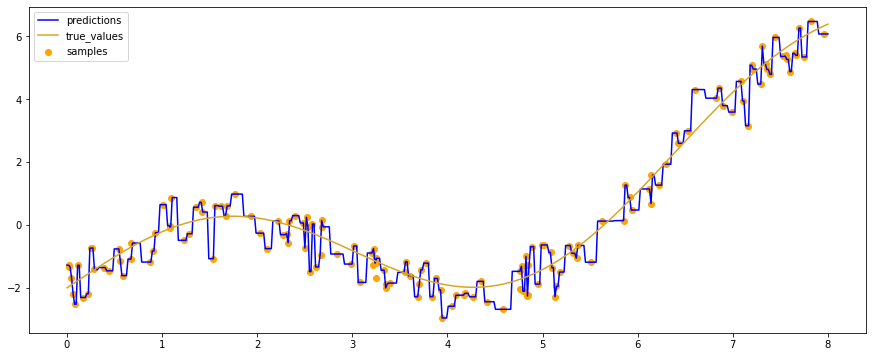

In [313]:
plot_prediction(ys_dt);

In [314]:
dt3 = DecisionTreeRegressor(max_depth=3)
dt3.fit(X, y)

ys_dt3 = dt3.predict(Xs)

mean_squared_error(true_ys, ys_dt3), mean_squared_error(y, dt3.predict(X))

(0.2787144224875398, 0.4436358447100894)

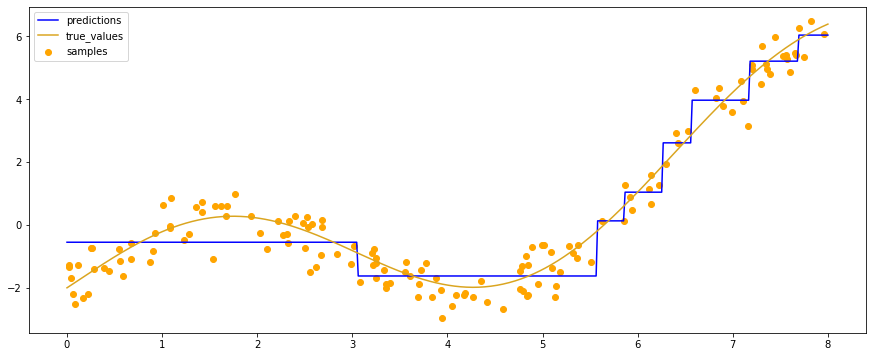

In [315]:
plot_prediction(ys_dt3);

In [316]:
from sklearn.tree import export_graphviz
export_graphviz(dt3, 'decision-tree3.dot')

In [317]:
dt4 = DecisionTreeRegressor(max_depth=4)
dt4.fit(X, y)

ys_dt4 = dt4.predict(Xs)

mean_squared_error(true_ys, ys_dt4), mean_squared_error(y, dt4.predict(X))

(0.16181584172535748, 0.25671569164279173)

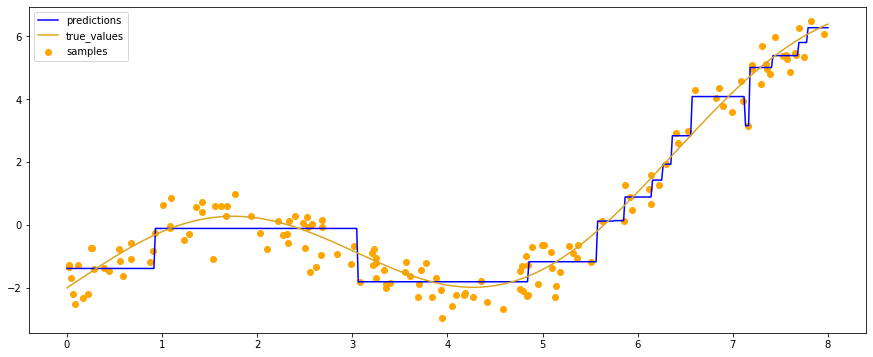

In [318]:
plot_prediction(ys_dt4);

In [320]:
from sklearn.tree import export_graphviz
export_graphviz(dt4, 'decision-tree4.dot')

In [321]:
from sklearn.tree import export_graphviz
export_graphviz(dt, 'decision-tree.dot')

# Ensembles von Entscheidungsbäumen

- Bei Entscheidungsbäumen gibt es mehr Möglichkeiten Ensembles zu erzeugen:
    - Averaging: Bildung von Mittelwerten mehrerer starker Estimators
    - Boosting: Bilden einer Sequenz von schwachen Estimators, bei der spätere Estimators gezielt die Schwächen der ersten beseitigen

In [ ]:
from sklearn.ensemble import RandomForestRegressor
rf = RandomForestRegressor(n_estimators=10, max_depth=5)
rf.fit(X, y)

ys_rf = rf.predict(Xs)

mean_squared_error(true_ys, ys_rf), mean_squared_error(y, rf.predict(X))

In [ ]:
plot_prediction(ys_rf);

In [ ]:
from sklearn.ensemble import AdaBoostRegressor
ab = AdaBoostRegressor(n_estimators=100, base_estimator=DecisionTreeRegressor(max_depth=4))
ab.fit(X, y)

ys_ab = ab.predict(Xs)

mean_squared_error(true_ys, ys_ab), mean_squared_error(y, ab.predict(X))

In [ ]:
plot_prediction(ys_ab);

## Mini-Workshop

- Notebook `050x-NumPy`
- Abschnitt "Regression mit KNN": Mit Entscheidungsbäumen und Ensembles von Entscheidungsbäumen.


# Bilderkennung mit KNNs

Wir wollen den MNIST Datensatz mit Hilfe von KNNs klassifizieren. Um konsistent mit den Deep Learning Aufgaben zu sein verwenden wir den Datensatz aus `tensorflow.keras.datasets`.

In [ ]:
import numpy as np
from matplotlib import pyplot as plt
from tensorflow.keras.datasets import mnist
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score

In [ ]:
(X_train_in, y_train), (X_test_in, y_test) = mnist.load_data()

In [ ]:
def plot_random_datapoint():
    sample = np.random.randint(0, X_train_in.shape[0])

    plt.figure(figsize = (10,10))
    mnist_img = X_train_in[sample]
    plt.imshow(mnist_img, cmap="Greys")

    # Get the `Axes` instance on the current figure
    ax = plt.gca()

    plt.tick_params(
        axis='both', which='major', bottom=True, left=True,
        labelbottom=False, labelleft=False)

    plt.tick_params(
        axis='both', which='minor', bottom=False, left=False,
        labelbottom=True, labelleft=True)

    ax.set_xticks(np.arange(-.5, 28, 1))
    ax.set_yticks(np.arange(-.5, 28, 1))

    ax.set_xticks(np.arange(0, 28, 1), minor=True);
    ax.set_xticklabels([str(i) for i in np.arange(0, 28, 1)], minor=True);
    ax.set_yticks(np.arange(0, 28, 1), minor=True);
    ax.set_yticklabels([str(i) for i in np.arange(0, 28, 1)], minor=True);

    ax.grid(color='black', linestyle='-', linewidth=1.5)
    plt.colorbar(fraction=0.046, pad=0.04, ticks=[0,32,64,96,128,160,192,224,255])

In [ ]:
plot_random_datapoint()

In [ ]:
def preprocess_data(data):
    return data.reshape(-1, 28 * 28)


In [ ]:
X_train = preprocess_data(X_train_in)
X_test = preprocess_data(X_test_in)

In [ ]:
def shuffle(X, y):
    Xs = np.column_stack((X, y))
    np.random.shuffle(Xs)
    return Xs[:, :-1], Xs[:, -1]

In [ ]:
X_train, y_train = shuffle(X_train, y_train)
X_test, y_test = shuffle(X_test, y_test)

In [ ]:
X_train, y_train = X_train[:5000], y_train[:5000]
X_test, y_test = X_test[:1000], y_test[:1000]

In [ ]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

In [ ]:
n_neighbors = 5
knn = KNeighborsClassifier(n_neighbors)
knn.fit(X_train, y_train)

In [ ]:
y_pred = knn.predict(X_test)
y_pred[:10], y_test[:10]

In [ ]:
(accuracy_score(y_test, y_pred),
 precision_score(y_test, y_pred, average='macro'),
 recall_score(y_test, y_pred, average='macro'))

## Mini-Workshop

- Notebook `050x-NumPy`
- Abschnitt "Bilderkennung mit KNNs"


## Mini-Workshop

- Notebook `050x-NumPy`
- Abschnitt "Bilderkennung mit Ensembles und Entscheidungsbäumen"


## Minimum, Maximum, Summe, ...

In [ ]:
np.random.seed(101)
vec = np.random.rand(10)
vec

In [ ]:
vec.max()

In [ ]:
vec.argmax()

In [ ]:
vec.min()

In [ ]:
vec.argmin()

In [ ]:
np.random.seed(101)
arr = np.random.rand(2, 5)
arr

In [ ]:
arr.max()

In [ ]:
arr.argmax()

In [ ]:
arr.min()

In [ ]:
arr.argmin()

## Mini-Workshop

- Notebook `050x-NumPy`
- Abschnitt "Extrema"


In [ ]:
arr.reshape(arr.size)[arr.argmin()]

In [ ]:
arr[np.unravel_index(arr.argmin(), arr.shape)]

In [ ]:
arr

In [ ]:
arr.sum()

In [ ]:
arr.sum(axis=0)

In [ ]:
arr.sum(axis=1)

In [ ]:
arr.mean()

In [ ]:
arr.mean(axis=0)

In [ ]:
arr.mean(axis=1)

## Mini-Workshop

- Notebook `050x-NumPy`
- Abschnitt "Mittelwert"


## Exkurs: Einfache Monte Carlo Simulation

Mit der folgenden Monte Carlo Simulation kann eine Approximation von $\pi$ berechnet werden.

Die Grundidee ist zu berechnen, welcher Anteil an zufällig gezogenen Paaren aus Zahlen $(x, y)$, mit $x, y \sim SV[0, 1)$  (d.h., unabhängig und stetig auf $[0, 1)$ verteilt) eine $\ell^2$ Norm kleiner als 1 hat. Diese Zahl ist eine
Approximation von $\pi/4$.

Die folgende naive Implementiertung is in (fast) reinem Python geschrieben und verwendet NumPy nur zur Berechnung der Zufallszahlen.

In [ ]:
def mc_pi_1(n):
    num_in_circle = 0
    for i in range(n):
        xy = np.random.random(2)
        if (xy ** 2).sum() < 1:
            num_in_circle += 1
    return num_in_circle * 4 / n

In [ ]:
def test(mc_pi):
    np.random.seed(64)
    for n in [100, 10_000, 100_000, 1_000_000]:
        %time print(f"𝜋 ≈ {mc_pi(n)} ({n} iterations).")

In [ ]:
test(mc_pi_1)

Durch Just-in-Time Übersetzung mit Numba kann die Performance erheblich gesteigert werden:

In [ ]:
import numba
mc_pi_1_nb = numba.jit(mc_pi_1)

In [ ]:
test(mc_pi_1_nb)

Die folgende Implementierung verwendet die Vektorisierungs-Features von NumPy:

In [ ]:
def mc_pi_2(n):
    x = np.random.random(n)
    y = np.random.random(n)
    return ((x ** 2 + y ** 2) < 1).sum() * 4 / n

In [ ]:
test(mc_pi_2)

In [ ]:
# %time mc_pi_2(100_000_000)

Auch bei dieser Version können mit Numba Performance-Steigerungen erzielt werden, aber in deutlich geringerem Ausmaß:

In [ ]:
mc_pi_2_nb = numba.jit(mc_pi_2)

In [ ]:
test(mc_pi_2_nb)

In [ ]:
# %time mc_pi_2_nb(100_000_000)

## Mini-Workshop

- Notebook `050x-NumPy`
- Abschnitt "Roulette"


## Indizieren von NumPy Arrays

In [ ]:
vec = np.arange(10)

In [ ]:
vec

In [ ]:
vec[3]

In [ ]:
vec[3:8]

In [ ]:
vec[-1]

In [ ]:
arr = np.arange(24).reshape(4, 6)

In [ ]:
arr

In [ ]:
arr[1]

In [ ]:
arr[1][2]

In [ ]:
arr[1, 2]

In [ ]:
arr

In [ ]:
arr[1:3]

In [ ]:
arr[1:3][2:4]

In [ ]:
arr[1:3, 2:4]

In [ ]:
arr[:, 2:4]

In [ ]:
# Vorsicht!
arr[: 2:4]

In [ ]:
arr[:, 1:6:2]

## Broadcasting auf Slices

In NumPy Arrays werden Operationen oftmals auf Elemente (oder Unterarrays) "gebroadcastet":

In [ ]:
arr = np.ones((3, 3))

In [ ]:
arr[1:, 1:] = 2.0

In [ ]:
arr

In [ ]:
lst = [1, 2, 3]
vec = np.array([1, 2, 3])

In [ ]:
lst[:] = [99]

In [ ]:
vec[:] = [99]

In [ ]:
lst

In [ ]:
vec

In [ ]:
vec[:] = 11
vec

### Vorsicht beim `lst[:]` Idiom! 

In [ ]:
lst1 = list(range(10))
lst2 = lst1[:]
vec1 = np.arange(10)
vec2 = vec1[:]

In [ ]:
lst1[:] = [22] * 10
lst1

In [ ]:
lst2

In [ ]:
vec1[:] = 22
vec1

In [ ]:
vec2

In [ ]:
vec1 = np.arange(10)
vec2 = vec1.copy()

In [ ]:
vec1[:] = 22
vec1

In [ ]:
vec2

## Bedingte Selektion

NumPy Arrays können als Index auch ein NumPy Array von Boole'schen Werten erhalten, das den gleichen Shape hat wie das Array.

Dadurch werden die Elemente selektiert, an deren Position der Boole'sche Vektor den Wert `True` hat und als Vektor zurückgegeben.

In [ ]:
vec = np.arange(8)
bool_vec = (vec % 2 == 0)

In [ ]:
vec[bool_vec]

In [ ]:
arr = np.arange(8).reshape(2, 4)
bool_arr = (arr % 2 == 0)
bool_arr

In [ ]:
arr[bool_arr]

In [ ]:
# Fehler!
# arr[bool_vec]

In [ ]:
vec[vec % 2 > 0]

In [ ]:
arr[arr < 5]

### Boole'sche Operationen auf NumPy Arrays

In [ ]:
bool_vec

In [ ]:
neg_vec = np.logical_not(bool_vec)

In [ ]:
bool_vec & neg_vec

In [ ]:
bool_vec | neg_vec

## Universelle NumPy Operationen

NumPy bietet viele "universelle" Funktionen an, die auf NumPy Arrays, Listen und Zahlen angewendet werden können:

In [ ]:
vec1 = np.random.randn(5)
vec2 = np.random.randn(5)
list1 = list(vec1)
list2 = list(vec2)

In [ ]:
vec1

In [ ]:
list1

In [ ]:
np.sin(vec1)

In [ ]:
np.sin(list1)

In [ ]:
import math
np.sin(math.pi)

In [ ]:
np.sum(vec1)

In [ ]:
np.sum(list1)

In [ ]:
np.mean(vec1)

In [ ]:
np.median(vec1)

In [ ]:
np.std(vec1)

In [ ]:
np.greater(vec1, vec2)

In [ ]:
np.greater(list1, list2)

In [ ]:
np.greater(vec1, list2)

In [ ]:
np.maximum(vec1, vec2)

In [ ]:
np.maximum(list1, list2)

In [ ]:
np.maximum(list1, vec2)

Eine vollständige Liste sowie weitere Dokumentation findet man [hier](https://docs.scipy.org/doc/numpy/reference/ufuncs.html).